# Import Packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image  
import pydotplus

#To scale the data using z-score 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

#Algorithms to use
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree, metrics
from sklearn import linear_model, preprocessing
from io import StringIO
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.datasets import make_classification

#To tune the model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve
from sklearn.metrics import recall_score, ConfusionMatrixDisplay, roc_curve
from sklearn.metrics import precision_score


from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from sklearn.svm import LinearSVC
np.random.seed(42)

# Load Data 

In [2]:
# Read the given data
df = pd.read_csv('hotel_bookings.csv')

# Explore Data

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
df.shape

(119390, 32)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
for c in [np.object, np.float64, np.int64]:
    print(str(c))
    print(df.loc[:, df.dtypes==c].columns.values)

<class 'object'>
['hotel' 'arrival_date_month' 'meal' 'country' 'market_segment'
 'distribution_channel' 'reserved_room_type' 'assigned_room_type'
 'deposit_type' 'customer_type' 'reservation_status'
 'reservation_status_date']
<class 'numpy.float64'>
['children' 'agent' 'company' 'adr']
<class 'numpy.int64'>
['is_canceled' 'lead_time' 'arrival_date_year' 'arrival_date_week_number'
 'arrival_date_day_of_month' 'stays_in_weekend_nights'
 'stays_in_week_nights' 'adults' 'babies' 'is_repeated_guest'
 'previous_cancellations' 'previous_bookings_not_canceled'
 'booking_changes' 'days_in_waiting_list' 'required_car_parking_spaces'
 'total_of_special_requests']


In [7]:
num_cols = df.select_dtypes('number').columns
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


# Cleaning the Data

In [8]:
# Check out the names of our data's columns 
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

Checking the missing values and impute them.

In [9]:
#Count the number of missing values in each column and sort them.
missing =pd.concat ([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='%', ascending=False)

,count,%
company,112593,94.306893
agent,16340,13.686238
country,488,0.408744
children,4,0.003350
reserved_room_type,0,0.000000
assigned_room_type,0,0.000000
booking_changes,0,0.000000
deposit_type,0,0.000000
hotel,0,0.000000
previous_cancellations,0,0.000000


'company' and 'agent' variable are missing 94.3%  and 13.7% of their data. So, they can be dropped.

In [10]:
df.drop(['company', 'agent'], axis=1, inplace = True)

In [11]:
df['country'].value_counts()

PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
DJI        1
BWA        1
HND        1
VGB        1
NAM        1
Name: country, Length: 177, dtype: int64

PRT is the most frequent value, so we can fill the missing values in 'country' with it.

In [12]:
df['country'].fillna(value='PRT', inplace=True)

In [13]:
df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

We can impute the missing values in 'children' with the most frequent value of 0.

In [14]:
df['children'].fillna(value=0, inplace=True)

In [15]:
#Check if data holds duplicate values.
df.duplicated().any()

True

In [16]:
#Drop Duplicate entries 
df.drop_duplicates(inplace= False)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


'babies', 'adults', and 'children' can not be zero at the same time. Let's check.

In [17]:
filter = (df.children == 0) & (df.adults == 0) & (df.babies == 0)

In [18]:
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,...,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,...,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,...,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,...,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,...,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,...,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,...,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,...,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,...,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


There are 180 entries that has 0's on 'babies', 'adults' and 'children'. So, we will drop these.

In [19]:
df = df[~filter]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


'stays_in_weekend_nights' and 'stays_in_week_nights' can not be zero at the same time in real life. Let's check.

In [20]:
filter = (df.stays_in_weekend_nights == 0) & (df.stays_in_week_nights == 0)

In [21]:
df[filter]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
167,Resort Hotel,0,111,2015,July,28,6,0,0,2,...,H,0,No Deposit,0,Transient,0.0,0,2,Check-Out,2015-07-06
168,Resort Hotel,0,0,2015,July,28,6,0,0,1,...,H,0,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-06
196,Resort Hotel,0,8,2015,July,28,7,0,0,2,...,A,0,No Deposit,0,Transient,0.0,0,1,Check-Out,2015-07-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115483,City Hotel,0,15,2017,July,27,6,0,0,1,...,A,0,No Deposit,0,Transient-Party,0.0,0,0,Check-Out,2017-07-06
117701,City Hotel,0,0,2017,August,32,8,0,0,2,...,A,0,No Deposit,0,Transient,0.0,0,0,Check-Out,2017-08-08
118029,City Hotel,0,0,2017,August,33,14,0,0,2,...,A,0,No Deposit,0,Transient,0.0,0,0,Check-Out,2017-08-14
118631,City Hotel,0,78,2017,August,34,23,0,0,1,...,K,7,No Deposit,0,Transient-Party,0.0,0,0,Check-Out,2017-08-23


In [22]:
df = df[~filter]
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
5,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
6,Resort Hotel,0,0,2015,July,27,1,0,2,2,...,C,0,No Deposit,0,Transient,107.00,0,0,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [23]:
df['is_canceled'].value_counts()

0    74389
1    44176
Name: is_canceled, dtype: int64

Let's check if whether there are any obvious outliers to investigate. 

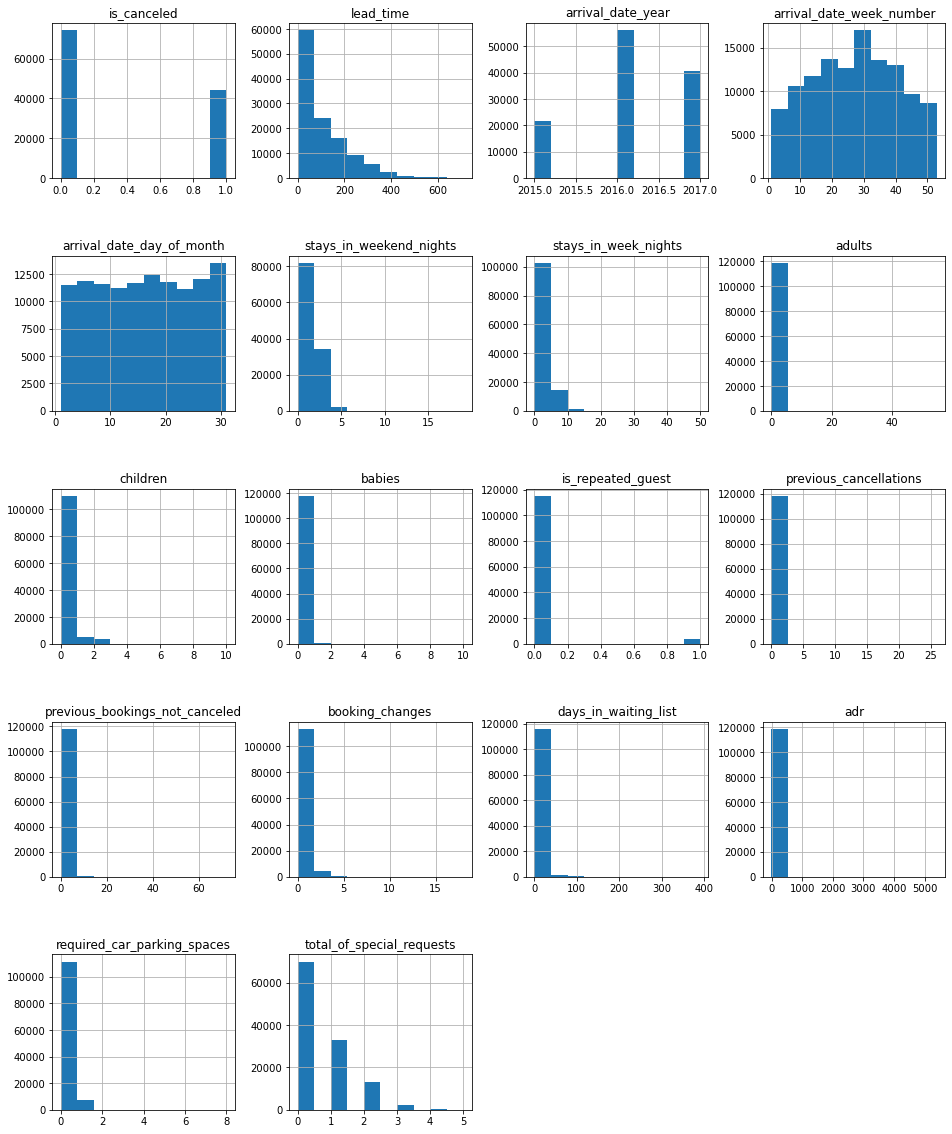

In [24]:
df.hist(figsize=(16, 20))
plt.subplots_adjust(hspace=0.5);

We need to double check 'stays_in_week_nights', 'stays_in_weekend_nights', 'adults', 'children', 'babies', 'booking_changes', 'days_in_waiting_list', 'adr' and 'required_car_parking_spaces' variables.

stays_in_week_nights
Skew : 2.78


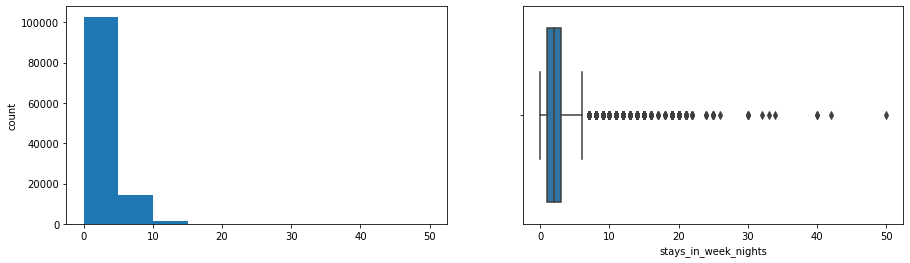

stays_in_weekend_nights
Skew : 1.32


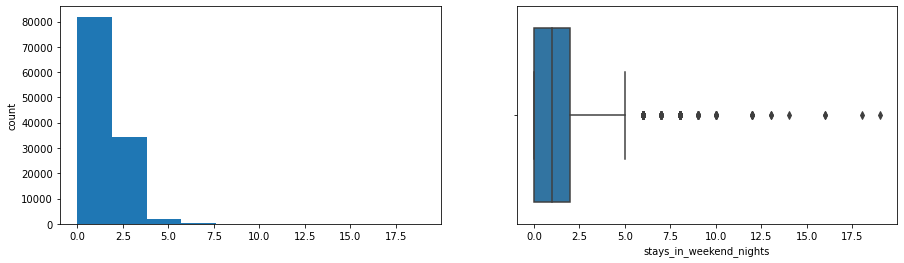

adults
Skew : 18.85


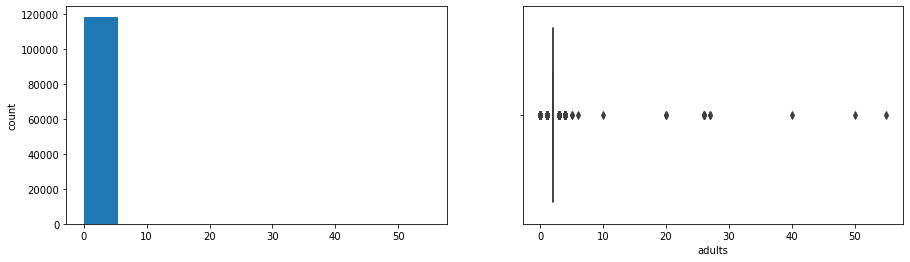

children
Skew : 4.11


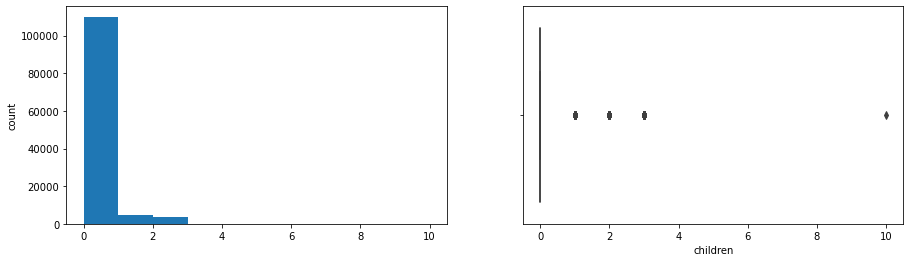

babies
Skew : 24.68


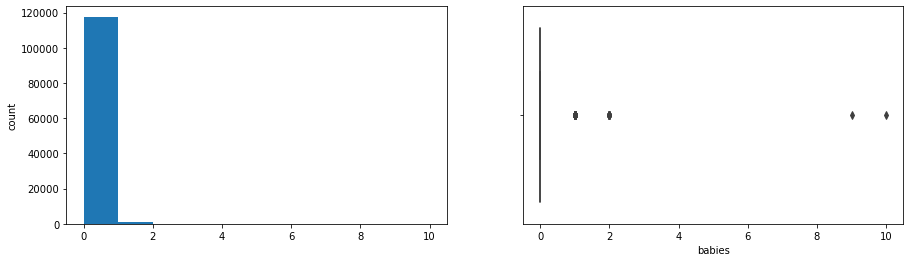

booking_changes
Skew : 5.51


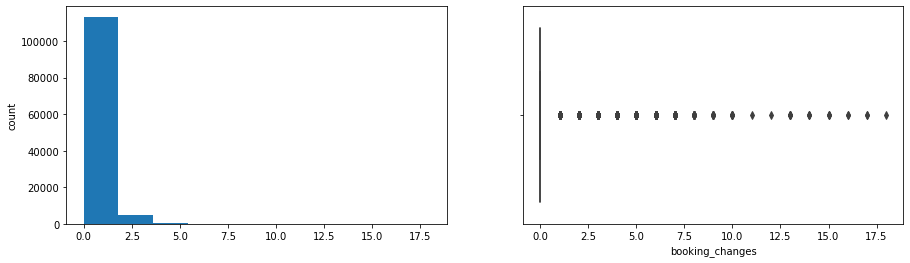

days_in_waiting_list
Skew : 11.92


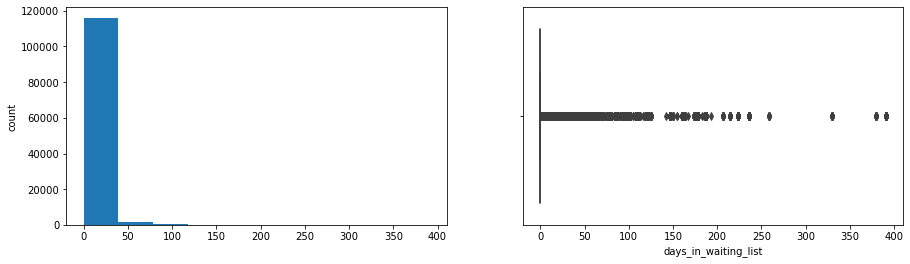

adr
Skew : 10.96


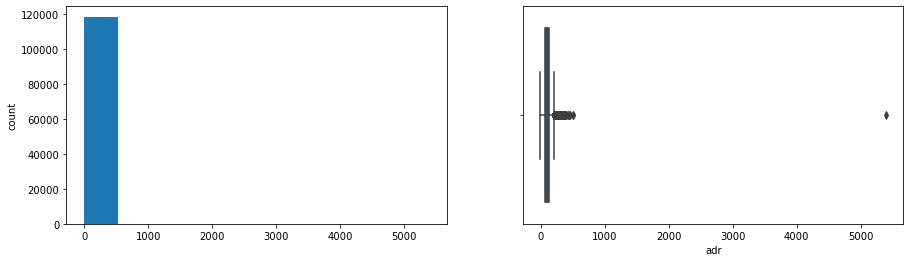

required_car_parking_spaces
Skew : 4.16


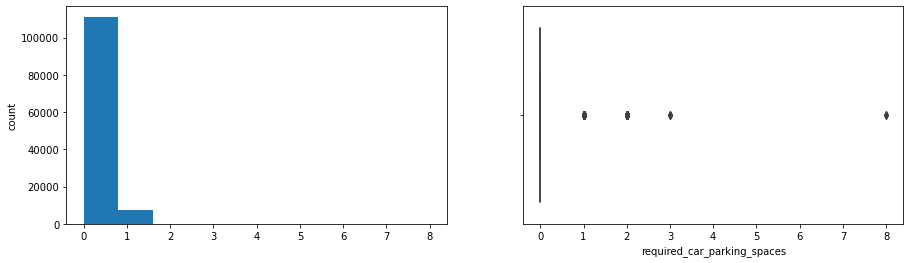

In [25]:
for col in ['stays_in_week_nights', 'stays_in_weekend_nights', 'adults', 'children', 'babies', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces']:
    print(col)
    print('Skew :',round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show()

There is an obvious outlier on 'adr' and 'required_car_parking_spaces'. Drop the outliers.

In [26]:
#Sorting the dataset in 'descending' order using the feature 'adr' to see the outlier.
df.sort_values('adr', ascending=False).head(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
48515,City Hotel,1,35,2016,March,13,25,0,1,2,...,A,1,Non Refund,0,Transient,5400.00,0,0,Canceled,2016-02-19
111403,City Hotel,0,0,2017,May,19,9,0,1,1,...,G,0,No Deposit,0,Transient,510.00,0,0,Check-Out,2017-05-10
15083,Resort Hotel,0,1,2015,July,29,15,0,1,2,...,C,0,No Deposit,0,Transient,508.00,1,0,Check-Out,2015-07-16
103912,City Hotel,0,81,2016,December,53,31,1,1,2,...,E,1,No Deposit,0,Transient-Party,451.50,0,4,Check-Out,2017-01-02
13142,Resort Hotel,1,378,2017,August,31,1,4,10,2,...,A,0,No Deposit,0,Transient,450.00,0,0,Canceled,2016-07-22
13391,Resort Hotel,1,59,2017,August,33,13,2,4,2,...,H,1,No Deposit,0,Transient,437.00,0,0,Canceled,2017-08-03
39155,Resort Hotel,0,31,2017,August,31,1,2,6,2,...,G,0,No Deposit,0,Transient,426.25,0,2,Check-Out,2017-08-09
39568,Resort Hotel,0,104,2017,August,33,17,2,3,3,...,H,2,No Deposit,0,Transient,402.00,0,1,Check-Out,2017-08-22
39118,Resort Hotel,0,26,2017,July,31,31,3,5,3,...,H,1,No Deposit,0,Transient,397.38,0,1,Check-Out,2017-08-08
13323,Resort Hotel,1,116,2017,August,32,9,2,8,2,...,F,3,No Deposit,0,Transient,392.00,0,0,Canceled,2017-04-17


In [27]:
# Removing the 'row' at index 48515 from the data. It has an extreme value of 5400 in the 'adr'. 
df.drop([48515], axis=0, inplace = True)

In [28]:
df.shape

(118564, 30)

In [29]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

Final data set we are going to use, consists of 118564 rows and 30 columns; and all the missing data are treated successfully.

# Exploratory Data Analysis

Checking data balancing.

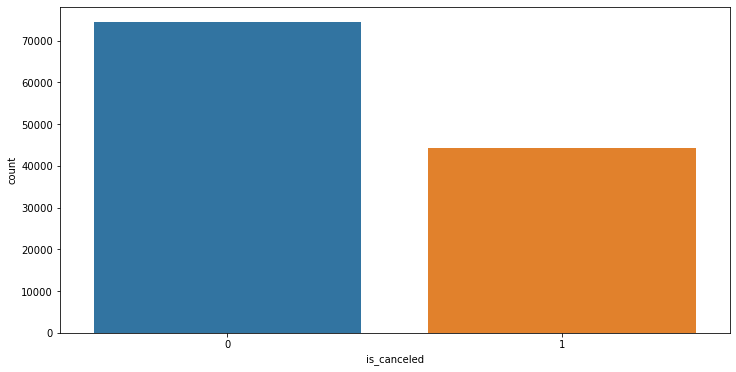

In [30]:
plt.figure(figsize=(12, 6))
sns.countplot('is_canceled',data=df)
plt.show()

Our data is imbalanced.

<AxesSubplot:>

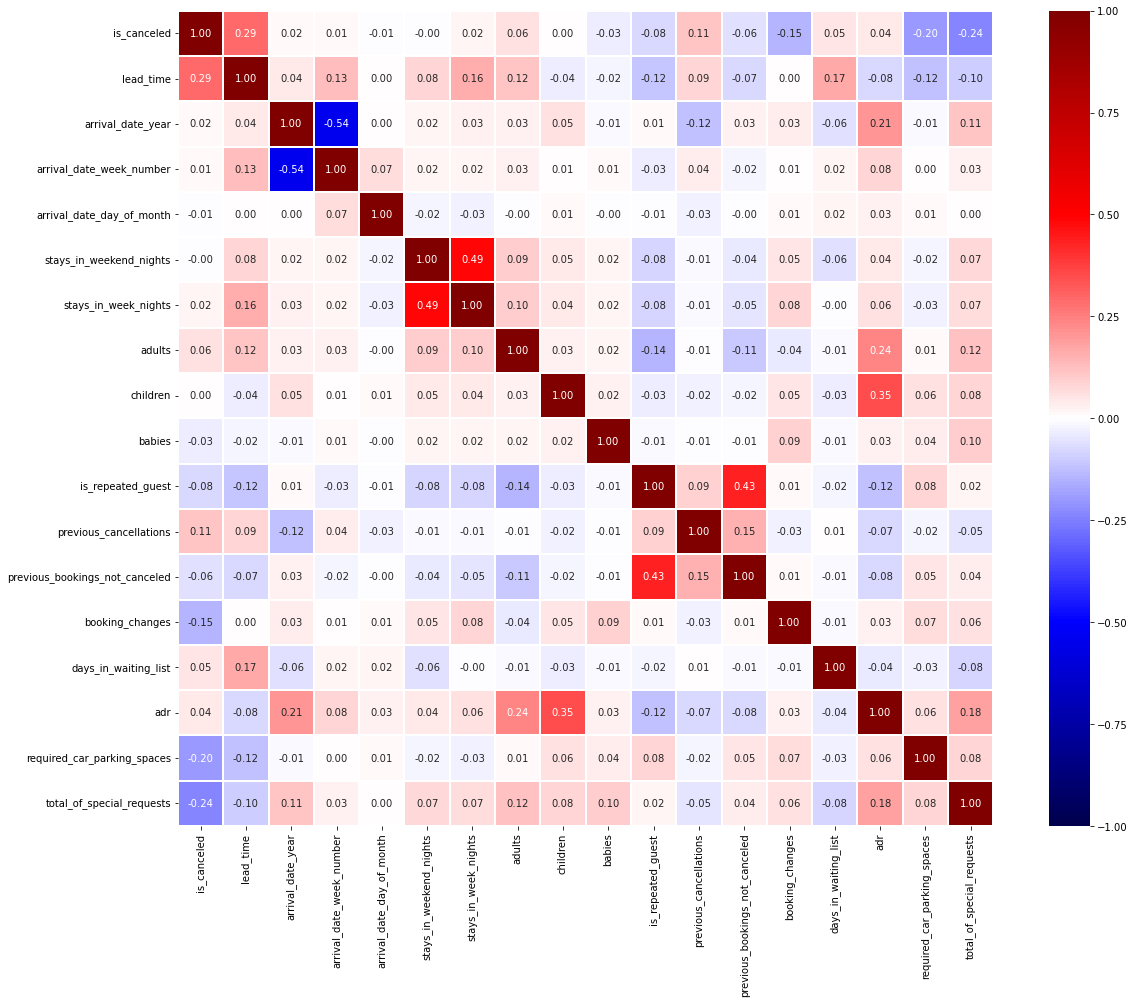

In [31]:
plt.subplots(figsize=(20,15))
df_corr=df.corr()
#sns.heatmap(df.corr());
sns.heatmap(df_corr, annot=True, fmt=".2f", cmap='seismic', vmin=-1, vmax=1, center= 0, square=True, linewidths=2)

In [32]:
df.corr()['is_canceled'].abs().sort_values(ascending=False)

is_canceled                       1.000000
lead_time                         0.291525
total_of_special_requests         0.236160
required_car_parking_spaces       0.196803
booking_changes                   0.145214
previous_cancellations            0.109976
is_repeated_guest                 0.077790
adults                            0.057572
previous_bookings_not_canceled    0.057541
days_in_waiting_list              0.053943
adr                               0.040156
babies                            0.032672
stays_in_week_nights              0.020712
arrival_date_year                 0.015440
arrival_date_week_number          0.009031
arrival_date_day_of_month         0.006119
stays_in_weekend_nights           0.004849
children                          0.004681
Name: is_canceled, dtype: float64

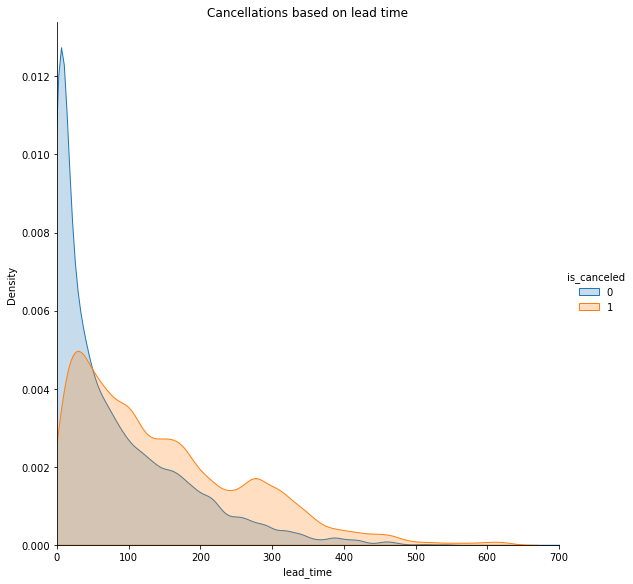

In [33]:
(sns.FacetGrid(df, hue='is_canceled', height=8, xlim=(0,700))
.map(sns.kdeplot,'lead_time', shade=True)
.add_legend())
plt.title('Cancellations based on lead time')
plt.show()

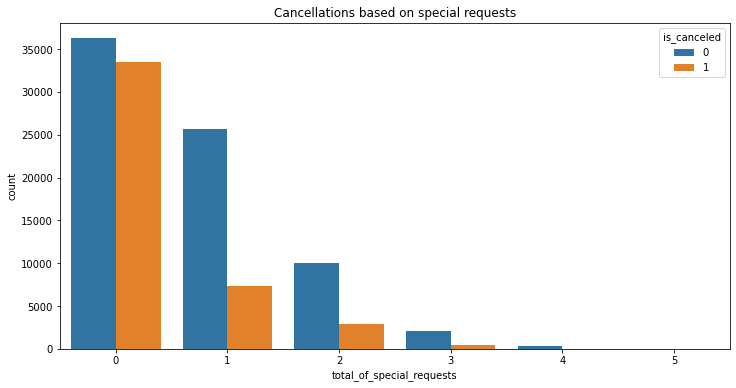

In [34]:
plt.figure(figsize=(12, 6))
sns.countplot(x='total_of_special_requests', hue='is_canceled', data=df)
plt.title('Cancellations based on special requests')
plt.show()

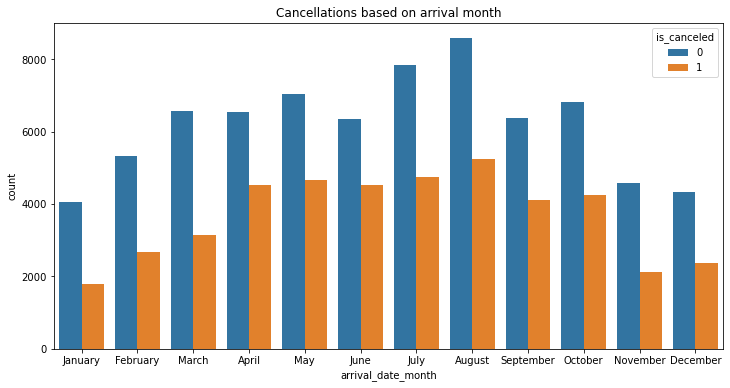

In [35]:
#!pip install sort-dataframeby-monthorweek
#!pip install sorted-months-weekdays
import sort_dataframeby_monthorweek as sd
def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)
df_m=sort_month(df, 'arrival_date_month')
plt.figure(figsize=(12, 6))
sns.countplot(x='arrival_date_month', hue='is_canceled', data=df_m)
plt.title('Cancellations based on arrival month')
plt.show()

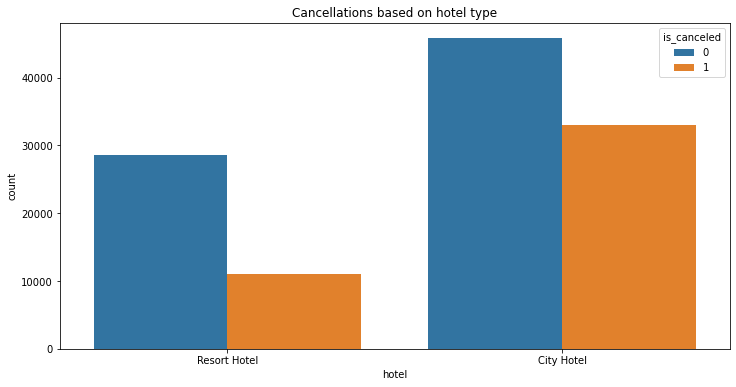

In [36]:
plt.figure(figsize=(12, 6))
sns.countplot('hotel',data=df,hue='is_canceled')
plt.title('Cancellations based on hotel type')
plt.show()

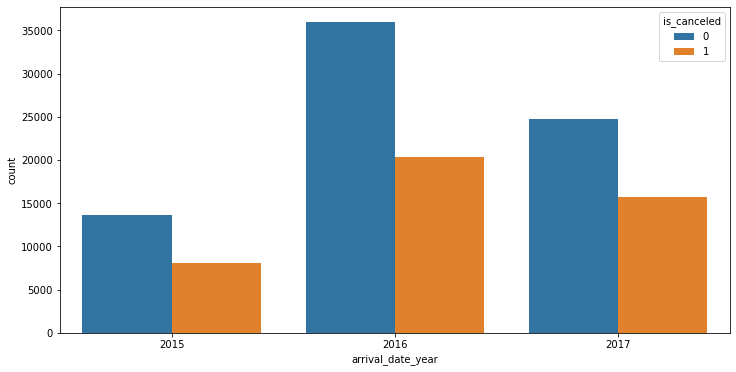

In [37]:
plt.figure(figsize=(12, 6))
sns.countplot(x='arrival_date_year', hue='is_canceled', data=df)
plt.show()

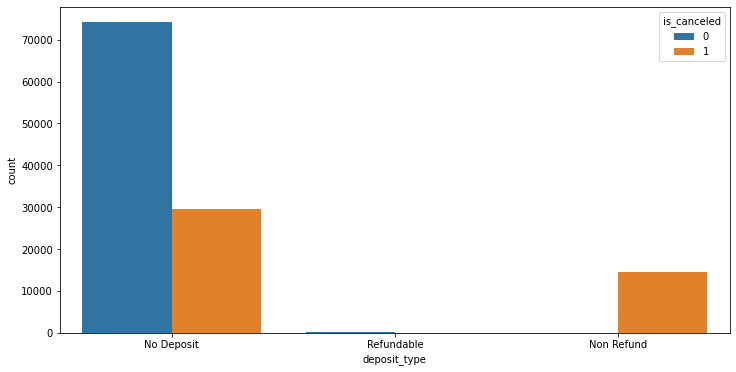

In [38]:
plt.figure(figsize=(12, 6))
sns.countplot(x="deposit_type", hue="is_canceled",data=df)
plt.show()

<Figure size 432x288 with 0 Axes>

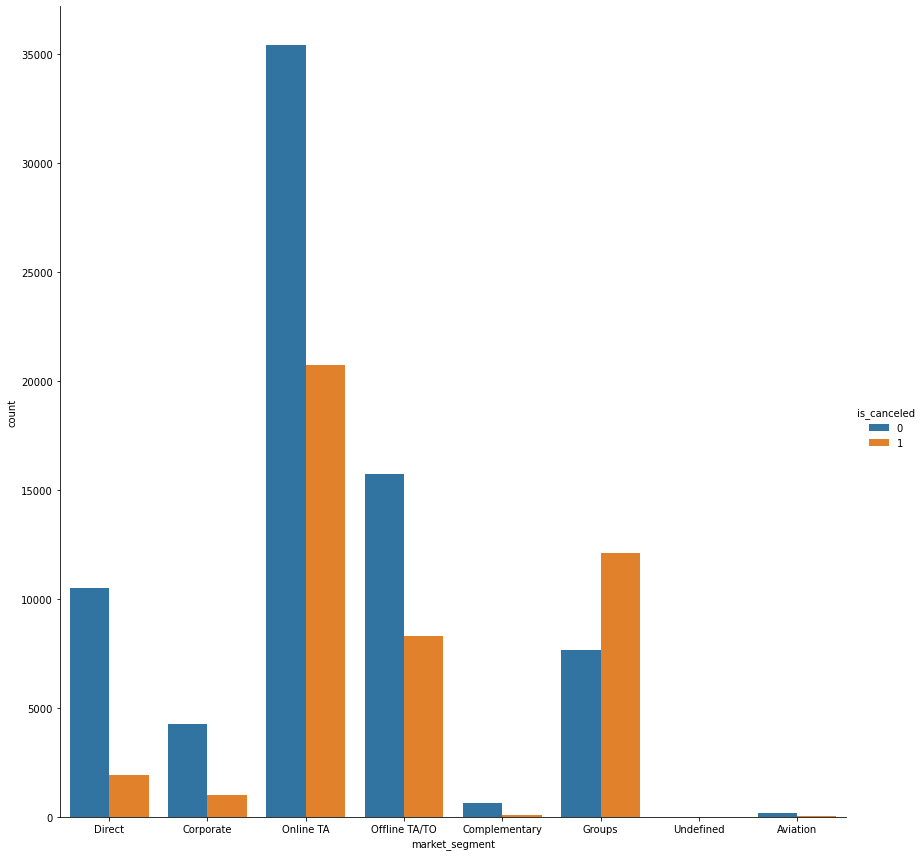

In [39]:
plt.figure()
sns.catplot(data=df, x='market_segment', kind='count', hue='is_canceled', height=12)
#chart.set_xticklabels(rotation=65, horizontalalignment='right')
plt.show()

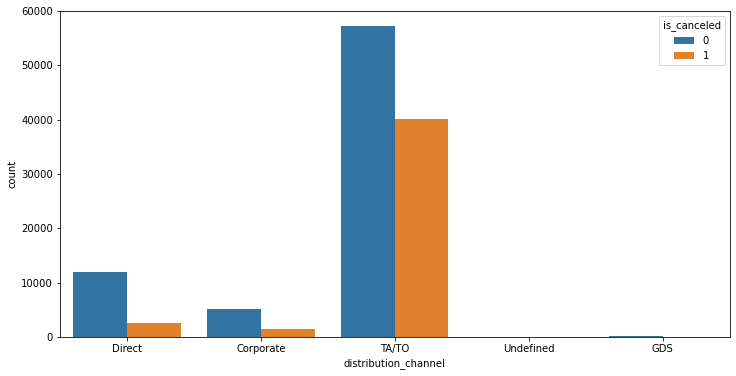

In [40]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='distribution_channel', hue='is_canceled')
plt.show()

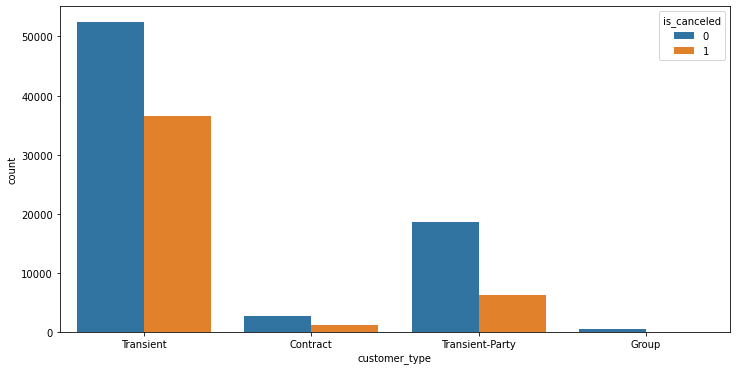

In [41]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='customer_type', hue='is_canceled')
plt.show()

# Model Building

In [42]:
df.drop(['meal', 'assigned_room_type', 'reserved_room_type', 'reservation_status', 'reservation_status_date'], axis=1, inplace=True)

categorical_features= ['hotel', 'arrival_date_month', 'country', 'market_segment',
 'distribution_channel', 'deposit_type', 'customer_type']
df = pd.get_dummies(df, columns = categorical_features)
print('The data have ', df.shape[0], ' rows and ', df.shape[1], ' columns\n')
print('column names: \n')
print('\n'.join(list(df.columns)))

The data have  118564  rows and  229  columns

column names: 

is_canceled
lead_time
arrival_date_year
arrival_date_week_number
arrival_date_day_of_month
stays_in_weekend_nights
stays_in_week_nights
adults
children
babies
is_repeated_guest
previous_cancellations
previous_bookings_not_canceled
booking_changes
days_in_waiting_list
adr
required_car_parking_spaces
total_of_special_requests
hotel_City Hotel
hotel_Resort Hotel
arrival_date_month_April
arrival_date_month_August
arrival_date_month_December
arrival_date_month_February
arrival_date_month_January
arrival_date_month_July
arrival_date_month_June
arrival_date_month_March
arrival_date_month_May
arrival_date_month_November
arrival_date_month_October
arrival_date_month_September
country_ABW
country_AGO
country_AIA
country_ALB
country_AND
country_ARE
country_ARG
country_ARM
country_ASM
country_ATA
country_ATF
country_AUS
country_AUT
country_AZE
country_BDI
country_BEL
country_BEN
country_BFA
country_BGD
country_BGR
country_BHR
country_B

In [43]:
# Splitting X and Y
X=df.drop('is_canceled',  axis=1)
y=df['is_canceled']
list(X.columns)

['lead_time',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'booking_changes',
 'days_in_waiting_list',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'hotel_City Hotel',
 'hotel_Resort Hotel',
 'arrival_date_month_April',
 'arrival_date_month_August',
 'arrival_date_month_December',
 'arrival_date_month_February',
 'arrival_date_month_January',
 'arrival_date_month_July',
 'arrival_date_month_June',
 'arrival_date_month_March',
 'arrival_date_month_May',
 'arrival_date_month_November',
 'arrival_date_month_October',
 'arrival_date_month_September',
 'country_ABW',
 'country_AGO',
 'country_AIA',
 'country_ALB',
 'country_AND',
 'country_ARE',
 'country_ARG',
 'country_ARM',
 'country_ASM',
 'country_ATA',
 'country_ATF',
 'country_AUS',
 'country_AUT',
 'co

In [44]:
# Splitting data into train and test
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state=2)
print(X_train.shape, X_test.shape)

(88923, 228) (29641, 228)


In [45]:
#scale data
from sklearn import preprocessing
import numpy as np
# build scaler based on training data and apply it to test data to then also scale the test data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [46]:
def plot_y_ratios(y, y_test):
    fig, ax = plt.subplots(2, sharex = True)
    ax[0].bar(x = [0, 1], height = [y[y == 0].count(), 
                                    y[y == 1].count()])
    ax[0].set_ylabel('train', fontsize = 8)
    ax[0].set_ylim(0, 60000)
    ax[1].bar(x = [0, 1], height = [y_test[y_test == 0].count(),
                                    y_test[y_test == 1].count()])
    ax[1].set_ylabel('test', fontsize = 8)
    ax[1].set_ylim(0, 60000)
    ax[1].set_xticks([0, 1])
    ax[0].tick_params(which = 'both', labelsize = 8)
    ax[1].tick_params(which = 'both', labelsize = 8)
    ax[1].set_xlabel('canceled\n(0 = not canceled)', fontsize = 8)
    ax[0].set_title('% canceled (where 1 means canceled):\n' +
                    'train: ' + str(round(100 * (y[y ==1].count()/y.shape[0]), 0)) +
                    '\ntest: ' + str(round(100 * (y_test[y_test ==1].count()/y_test.shape[0]), 0)),
                   fontsize = 10)
    plt.show() 

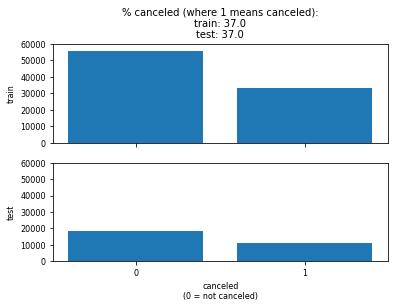

In [47]:
plot_y_ratios(y_train, y_test)

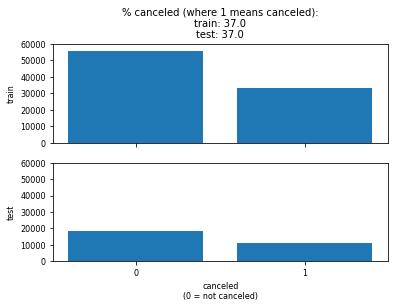

In [48]:
Xlrstrat, Xtestlrstrat, ylrstrat, ytestlrstrat = train_test_split(X, y, 
                                                                  random_state = 2, 
                                                                  stratify = y)
plot_y_ratios(ylrstrat, ytestlrstrat)

# 1. Logistic Regression

In [49]:
clf = LogisticRegression(solver = 'newton-cg', max_iter = 500)

In [50]:
clf.fit(Xlrstrat, ylrstrat) 

LogisticRegression(max_iter=500, solver='newton-cg')

In [51]:
y_predict_test = clf.predict(Xtestlrstrat)
y_predict_training = clf.predict(Xlrstrat)

In [52]:
print("[Test] Accuracy score (y_predict_test, ytestlrstrat):",
      f'{accuracy_score(y_predict_test, ytestlrstrat):.2f}')

[Test] Accuracy score (y_predict_test, ytestlrstrat): 0.81


In [53]:
print("[Training] Accuracy score: (ylrstrat, y_predict_training)", 
      f'{accuracy_score(ylrstrat, y_predict_training):.2f}')

[Training] Accuracy score: (ylrstrat, y_predict_training) 0.81


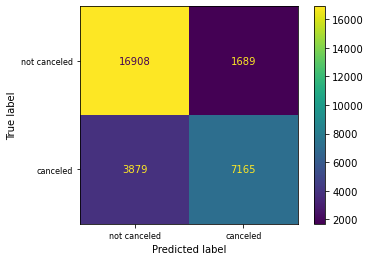

In [54]:
cm = confusion_matrix(ytestlrstrat, y_predict_test, labels = clf.classes_)
_, ax = plt.subplots()
display_cm = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['not canceled', 'canceled'])
ax.set_xticks([0, 1])
ax.set_yticks([0, 1])
ax.set_xticklabels(labels = ['not canceled', 'canceled'], fontsize = 8)
ax.set_yticklabels(labels = ['not canceled', 'canceled'], fontsize = 8)
display_cm.plot(ax = ax)

In [55]:
print(classification_report(ylrstrat, y_predict_training))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86     55792
           1       0.81      0.65      0.72     33131

    accuracy                           0.81     88923
   macro avg       0.81      0.78      0.79     88923
weighted avg       0.81      0.81      0.81     88923



In [56]:
print(classification_report(ytestlrstrat, y_predict_test))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86     18597
           1       0.81      0.65      0.72     11044

    accuracy                           0.81     29641
   macro avg       0.81      0.78      0.79     29641
weighted avg       0.81      0.81      0.81     29641



In [57]:
def cv_score(clf, x, y, score_func = accuracy_score):
    result = 0
    nfold = 5
    x.reset_index(drop = True, inplace = True)
    y.index = x.index
    for train, test in KFold(nfold, shuffle = True,
                             random_state = 42).split(x):
        clf.fit(x.loc[train, :], y[train])
        result += score_func(clf.predict(x.loc[test, :]), y[test])
    return result / nfold

clf = LogisticRegression(solver = 'liblinear', max_iter = 500)
score = cv_score(clf, X_train, y_train)
print(f'{score:.2f}')

0.81


In [58]:
# the grid of parameters to search over
#
Cs = [0.1, 1, 10, 100, 1000]

for i in Cs:
    lr=LogisticRegression(C=i)
    score=cv_score(lr, X_train, y_train)
    print("C :{}".format(i),"Accuracy Score:{}".format(score))


C :0.1 Accuracy Score:0.7747826256312118
C :1 Accuracy Score:0.7858818728879247
C :10 Accuracy Score:0.7837343514672873
C :100 Accuracy Score:0.7841616981006325
C :1000 Accuracy Score:0.7866020572866967


In [59]:
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
Cs = [0.1, 1, 10, 100, 1000]
score=accuracy_score
param_grid = {'C': Cs}

# Instantiate a logistic regression classifier: logreg
logreg =LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg,param_grid, cv=5,scoring="accuracy")

# Fit it to the data
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 100}
Best score is 0.7909766079342009


In [60]:
lr=LogisticRegression(C=1)
lr.fit(X_train, y_train)
y_pred=lr.predict(X_test)
accuracy=accuracy_score(y_test,y_pred)
print(" Accuracy on test set :{}".format(accuracy))

 Accuracy on test set :0.7747039573563645


In [61]:
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
Cs = [0.001, 0.1, 1, 10, 100]
score=accuracy_score
param_grid = {'C': Cs}

# Instantiate a logistic regression classifier: logreg
logreg =LogisticRegression()

# Instantiate the GridSearchCV object: logreg_cv
logreg_cv = GridSearchCV(logreg,param_grid, cv=5,scoring="accuracy")

# Fit it to the data
logreg_cv.fit(X_train,y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))
## running the best grid search method on test data ans calculating accuracy
y_pred1=logreg_cv.predict(X_test)
accuracy1=accuracy_score(y_test,y_pred)
print(" Accuracy on test set with grid search cv :{}".format(accuracy))

Tuned Logistic Regression Parameters: {'C': 100}
Best score is 0.7909766079342009
 Accuracy on test set with grid search cv :0.7747039573563645


# 2. Decision Tree

In [62]:
# Declare a variable called entr_model and use tree.DecisionTreeClassifier. 
entr_model=tree.DecisionTreeClassifier(criterion='entropy', random_state=1234)

# Call fit() on entr_model
entr_model.fit(X_train, y_train) 

# Call predict() on entr_model with X_test passed to it, and assign the result to a variable y_pred 
y_pred = entr_model.predict(X_test) 

# Call Series on our y_pred variable with the following: pd.Series(y_pred)
y_pred = pd.Series(y_pred) 

# Check out entr_model
entr_model

DecisionTreeClassifier(criterion='entropy', random_state=1234)

In [63]:
# Run this block for model evaluation metrics 
print("Model Entropy - no max depth")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Precision score for "No"' , metrics.precision_score(y_test,y_pred, pos_label = 0))
print('Recall score for "Yes"' , metrics.recall_score(y_test,y_pred, pos_label = 1))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Model Entropy - no max depth
Accuracy: 0.8518268614419217
Balanced accuracy: 0.8416998047310636
Precision score for "Yes" 0.7973879920188645
Precision score for "No" 0.8840719849583669
Recall score for "Yes" 0.8029223744292238
Recall score for "No" 0.8804772350329035


In [64]:
# Make a variable called gini_model, and assign it exactly what you assigned entr_model with above, but with the
# criterion changed to 'gini'
gini_model = tree.DecisionTreeClassifier(criterion='gini', random_state=1234)

# Call fit() on the gini_model as you did with the entr_model
gini_model.fit(X_train, y_train) 

# Call predict() on the gini_model as you did with the entr_model 
y_test=gini_model.predict(X_test) 

# Turn y_pred into a series, as before
y_pred = pd.Series(y_pred) 

# Check out gini_model
gini_model 

DecisionTreeClassifier(random_state=1234)

In [65]:
# Run this block for model evaluation
print("Model Gini impurity model")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Model Gini impurity model
Accuracy: 0.8740258425829088
Balanced accuracy: 0.8651463500898431
Precision score 0.8311264284418647
Recall score 0.8999193765116904


In [66]:
# Made a model as before, but call it entr_model2, and make the max_depth parameter equal to 3. 
# Execute the fitting, predicting, and Series operations as before
entr_model2 = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state=1234)
entr_model2.fit(X_train, y_train)
y_pred = entr_model.predict(X_test)
y_pred = pd.Series(y_pred)

entr_model2

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=1234)

In [67]:
# Run this block for model evaluation 
print("Model Entropy model max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score for "Yes"' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Recall score for "No"' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Model Entropy model max depth 3
Accuracy: 0.8740258425829088
Balanced accuracy: 0.8651463500898431
Precision score for "Yes" 0.8311264284418647
Recall score for "No" 0.8999193765116904


In [68]:
# As before, make a variable, but call it gini_model2, and ensure the max_depth parameter is set to 3
gini_model2 = tree.DecisionTreeClassifier(criterion ='gini', random_state = 1234,  max_depth = 3 )

# Do the fit, predict, and series transformations as before. 
gini_model2.fit(X_train, y_train)
y_pred = gini_model2.predict(X_test)
y_pred = pd.Series(y_pred)

gini_model2

DecisionTreeClassifier(max_depth=3, random_state=1234)

In [69]:
print("Gini impurity  model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Gini impurity  model - max depth 3
Accuracy: 0.7538544583516076
Balanced accuracy: 0.719395559561783
Precision score 0.7041484716157205
Recall score 0.8543402311206665


# 3. Random Forest

In [70]:
# Plug in appropriate max_depth and random_state parameters 
firstRFModel = RandomForestClassifier(max_depth=3, random_state=1234)

# Model and fit
firstRFModel.fit(X_train, y_train)
y_pred = firstRFModel.predict(X_test)
print("Random Forest  model - max depth 3")
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))
print("Balanced accuracy:", metrics.balanced_accuracy_score(y_test,y_pred))
print('Precision score' , metrics.precision_score(y_test,y_pred, pos_label = 1))
print('Recall score' , metrics.recall_score(y_test,y_pred, pos_label = 0))

Random Forest  model - max depth 3
Accuracy: 0.7555075739684896
Balanced accuracy: 0.6720340939851488
Precision score 0.9947767041002873
Recall score 0.998925020155872


In [71]:
rf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
model_res = rf.fit(X_train_scaled, y_train)
y_pred = model_res.predict(X_test_scaled)
y_pred_prob = model_res.predict_proba(X_test_scaled)
lr_probs = y_pred_prob[:,1]
ac = accuracy_score(y_test, y_pred)

f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

print('Random Forest: Accuracy=%.3f' % (ac))

print('Random Forest: f1-score=%.3f' % (f1))

Random Forest: Accuracy=0.888
Random Forest: f1-score=0.887


In [72]:
class_names=['isolated','released','missing','deceased']

Confusion matrix, without normalization
[[17511  1094]
 [ 2218  8818]]
Normalized confusion matrix
[[0.94 0.06]
 [0.2  0.8 ]]


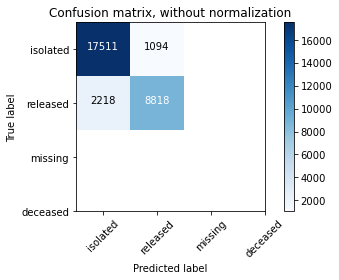

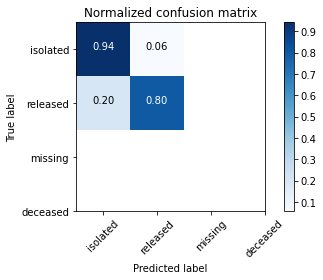

In [73]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')
#plt.savefig('figures/RF_cm_multi_class.png')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
#plt.savefig('figures/RF_cm_proportion_multi_class.png', bbox_inches="tight")
plt.show()

30


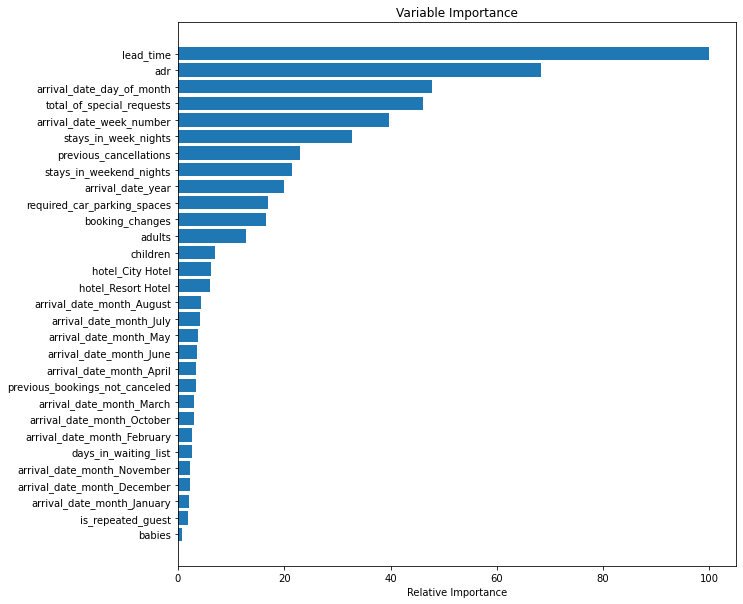

In [74]:
feature_importance = rf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

# 4. Gradient Boosting

In [75]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.626
Accuracy score (validation): 0.628

Learning rate:  0.1
Accuracy score (training): 0.627
Accuracy score (validation): 0.628

Learning rate:  0.25
Accuracy score (training): 0.749
Accuracy score (validation): 0.747

Learning rate:  0.5
Accuracy score (training): 0.749
Accuracy score (validation): 0.746

Learning rate:  0.75
Accuracy score (training): 0.744
Accuracy score (validation): 0.739

Learning rate:  1
Accuracy score (training): 0.740
Accuracy score (validation): 0.738



In [76]:
gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 0.5, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train, y_train)

y_pred = gb.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.99      0.83     18605
           1       0.97      0.33      0.49     11036

    accuracy                           0.75     29641
   macro avg       0.84      0.66      0.66     29641
weighted avg       0.81      0.75      0.70     29641



In [77]:
confusion_matrix(y_test, y_pred)

array([[18502,   103],
       [ 7428,  3608]], dtype=int64)

In [78]:
roc_curve(y_test, y_pred)

(array([0.  , 0.01, 1.  ]),
 array([0.  , 0.33, 1.  ]),
 array([2, 1, 0], dtype=int64))